# Probability Analysis on Contract Bridge

In [1]:
from itertools import product
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def fac(x):
    res = 1
    for i in range(1, x+1):
        res *= i
        
    return res

def c(n, r):
    return fac(n) // (fac(n-r) * fac(r))

def rep_p(l):
    s = set(l)
    res = 1
    for i in s:
        res *= fac(l.count(i))
        
    return fac(len(l)) // res

def bridge_prob_calculator(hand):
    return rep_p(hand) * c(13, hand[0]) * c(13, hand[1]) * c(13, hand[2]) * c(13, hand[3]) / c(52, 13)

def hcp_prob_calculator(point):
    tot_prob = 0
    for a, r, d, v in product(range(5), range(5), range(5), range(5)):
            hc = a + r + d + v
            hcp = 4 * a + 3 * r + 2 * d + v                
            if hc <= 13 and hcp == point:
                prob = c(4, a) * c(4, r) * c(4, d) * c(4, v) * c(36, 13 - hc) / c(52, 13)                   
                tot_prob += prob
                        
    return tot_prob

### Hands' Probability Analysis

In [2]:
hands = []
probs = []
cumsum = [0]
m = 0
for i, j, k, l in product(range(14), range(14), range(14), range(14)):
    hand = [i,j,k,l]
    hand.sort(reverse = True)
    if sum(hand) == 13 and hand not in hands:
        prob = bridge_prob_calculator(hand)
        hands.append(hand)
        probs.append(prob)
        m += 1
        print(m, '-', hand, ':', "{:.6f}".format(prob))
        cumsum.append(cumsum[-1] + prob)

1 - [13, 0, 0, 0] : 0.000000
2 - [12, 1, 0, 0] : 0.000000
3 - [11, 2, 0, 0] : 0.000000
4 - [10, 3, 0, 0] : 0.000002
5 - [9, 4, 0, 0] : 0.000010
6 - [8, 5, 0, 0] : 0.000031
7 - [7, 6, 0, 0] : 0.000056
8 - [11, 1, 1, 0] : 0.000000
9 - [10, 2, 1, 0] : 0.000011
10 - [9, 3, 1, 0] : 0.000100
11 - [8, 4, 1, 0] : 0.000452
12 - [7, 5, 1, 0] : 0.001085
13 - [6, 6, 1, 0] : 0.000723
14 - [9, 2, 2, 0] : 0.000082
15 - [8, 3, 2, 0] : 0.001085
16 - [7, 4, 2, 0] : 0.003617
17 - [6, 5, 2, 0] : 0.006511
18 - [7, 3, 3, 0] : 0.002652
19 - [6, 4, 3, 0] : 0.013262
20 - [5, 5, 3, 0] : 0.008952
21 - [5, 4, 4, 0] : 0.012433
22 - [10, 1, 1, 1] : 0.000004
23 - [9, 2, 1, 1] : 0.000178
24 - [8, 3, 1, 1] : 0.001176
25 - [7, 4, 1, 1] : 0.003918
26 - [6, 5, 1, 1] : 0.007053
27 - [8, 2, 2, 1] : 0.001924
28 - [7, 3, 2, 1] : 0.018808
29 - [6, 4, 2, 1] : 0.047021
30 - [5, 5, 2, 1] : 0.031739
31 - [6, 3, 3, 1] : 0.034482
32 - [5, 4, 3, 1] : 0.129307
33 - [4, 4, 4, 1] : 0.029932
34 - [7, 2, 2, 2] : 0.005130
35 - [6, 3, 2, 2

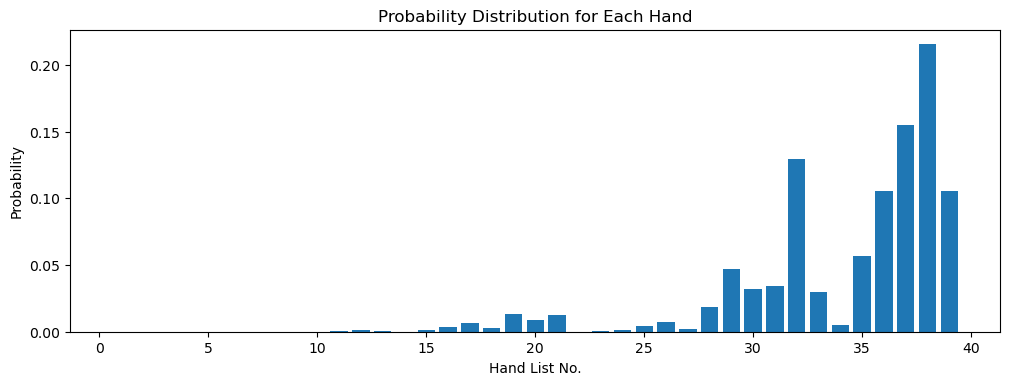

In [3]:
plt.figure(figsize=(12, 4), dpi=100)
plt.bar(np.linspace(1, 39, 39), probs)
plt.xlabel('Hand List No.')
plt.ylabel('Probability')
plt.title('Probability Distribution for Each Hand')
plt.show()

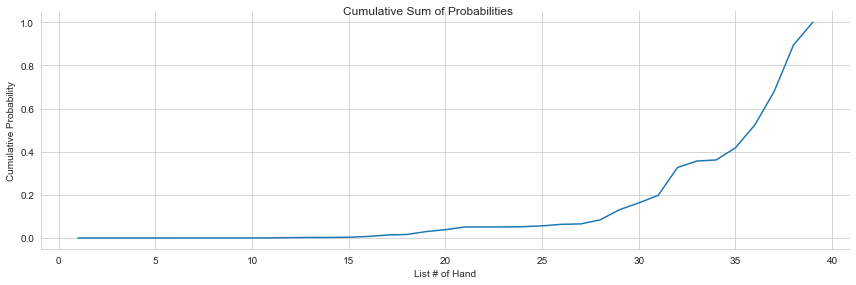

In [4]:
sns.set_style('whitegrid')
g = sns.relplot(x = np.linspace(1, 39, 39), y = cumsum[1:], kind = 'line', height= 4, aspect = 3)
g.fig.suptitle('Cumulative Sum of Probabilities')
g.set(xlabel = 'List # of Hand', ylabel = 'Cumulative Probability')

First graph shows probability distribution for each hand and second graph shows cumulative sum for hands (both in order written above). We can see that balanced and semibalanced hands are more possible than hands with void(s) or singleton(s). In addition, the chance of having a balanced hand is almost %50.

### HCP Analysis 

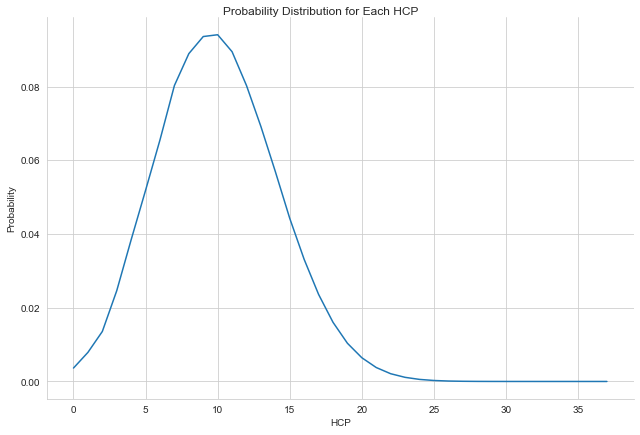

In [5]:
g = sns.relplot(x = np.linspace(0, 37, 38), y = [hcp_prob_calculator(i) for i in range(38)], kind = 'line', height= 6, aspect = 1.5)
g.fig.suptitle('Probability Distribution for Each HCP', y = 1)
g.set(xlabel = "HCP", ylabel = "Probability")

In [6]:
print('Expected HCP Val: {:.6f}'.format(np.sum([hcp_prob_calculator(i) for i in range(38)] * np.arange(0, 38))))

Expected HCP Val: 10.000000


We can see that HCP between 0-20 are more likely to happen than others. It's almost impossible to have more than 22 points in one hand.

In [7]:
bals = [[5,3,3,2], [4,3,3,3], [4,4,3,2]]
NT1_prob = 0
for i, j in product(range(15,18), range(3)):
    NT1_prob += hcp_prob_calculator(i) * (bridge_prob_calculator(bals[j]) if bals[j][0] != 5 else bridge_prob_calculator(bals[j]) / 2)
    
print('Probability of Declaring 1NT: {:.6f}'.format(NT1_prob))

Probability of Declaring 1NT: 0.040229
